# Twitter tweets preprocessed corpus - most frequent words

### 1. Install tweepy and necessary libraries

In [1]:
import os
import tweepy as tw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

### 2. Access the twitter API using the credentials

In [2]:
consumer_key = 'Ez7awfxGwYNDT0mTYbyRgZ7td'
consumer_secret = '36w6w4pMYtHvohBq7B3y8eaR1Xa3pnZCOaGxPR7xaR53hXwPpv'
access_token = '1347484634452434944-QLhjhdgjRs9vqFY1YRzwVfKXMVo1yv'
access_token_secret = 'BMezKgRNTnMYSOKGRmSVSxb5EoTiEk87y8eN1gKrddtVX'

### 3. Collect more than 1000 tweets of the hashtag

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAADnTfAEAAAAABRAmaS47QxS7h9yu7VleC9VChHk%3Dn7QmDgXeCq3QEINy9eoR4eKEeQPms8wdmhxrt3iwA47lasAxTD"
client = tw.Client(bearer_token=MY_BEARER_TOKEN)

In [5]:
query = "#nature"

tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified","description"],
                                     max_results = 100,
                                     expansions='author_id')

In [6]:
tweets

Response(data=[<Tweet id=1570286731639029760 text='RT @tinykarin: As far as one can see.. \n#nature #view #tree #mountains #blueskies https://t.co/jz58ejtYF4'>, <Tweet id=1570286723023925248 text='RT @Alice_Vogue: #I_Loves_it #Happy #Happiness #Nature #Smile #Beautiful #Feeling #Naturelover #FlowerPhotography #Heart #NaturePhotography…'>, <Tweet id=1570286721425874949 text='RT @CONTEMPRA_INN: Each Snowflake ❄️is Unique and Takes at least an hour to fall to Earth ❄️#Amazing #Awesome #Nature @BoazEmocoes8000 @CON…'>, <Tweet id=1570286716631785473 text='RT @Leticia35170144: Isle of Skye, Escocia 🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f🏔 #amazing  #nature  #mountains https://t.co/ZKCpNC7CSq'>, <Tweet id=1570286715071524867 text='RT @Alice_Vogue: #I_Loves_it #Happy #Happiness #Nature #Smile #Beautiful #Feeling #Naturelover #FlowerPhotography #Heart #NaturePhotography…'>, <Tweet id=1570286710763802628 text='RT @Alice_Vogue: #I_Loves_it #Happy #Happiness #Nature #Smile #B

In [7]:
tweet_info_ls = []

for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {'created_at': tweet.created_at,
                  'text': tweet.text,
                  'source': tweet.source,
                  'name': user.name,
                  'username': user.username,
                  'location': user.location,
                  'verified': user.verified,
                  'description': user.description}

    tweet_info_ls.append(tweet_info)

df = pd.DataFrame(tweet_info_ls)

df

,created_at,text,source,name,username,location,verified,description
0,2022-09-15 05:41:45+00:00,RT @tinykarin: As far as one can see.. \n#natu...,Twitter for Android,Ganesh,Ganeshgani90,None,False,"Acting is my hobby, Because of \nIn this world..."
1,2022-09-15 05:41:43+00:00,RT @Alice_Vogue: #I_Loves_it #Happy #Happiness...,Twitter for Android,Chris,Chris28688209,None,False,
2,2022-09-15 05:41:43+00:00,RT @CONTEMPRA_INN: Each Snowflake ❄️is Unique ...,Twitter for Android,berne🌹larry🍒,BerneLarry,None,False,I love the pictures and loving the sound of Le...
3,2022-09-15 05:41:42+00:00,"RT @Leticia35170144: Isle of Skye, Escocia 🏴󠁧󠁢...",Twitter for Android,Marinabontee🍎🌴🐬🌹🥂,marinabontee4,"France, Bretagne",False,“Life is like a camera. Focus on what’s import...
4,2022-09-15 05:41:42+00:00,RT @Alice_Vogue: #I_Loves_it #Happy #Happiness...,Twitter for iPhone,Katie Clemmer,clemmer_katie,None,False,"#DID/MPD #OSDD, animal lover, especially #cats..."
...,...,...,...,...,...,...,...,...
68,2022-09-15 05:38:33+00:00,RT @Schnappschuss7: #palmtrees #nature #bnw #N...,Twitter for iPhone,Adam Paczkowski PL,AdamPaczkowski_,None,False,
69,2022-09-15 05:38:33+00:00,RT @TakeTJ1: Flower\n花\n\n#photography #nature...,bauldellibro,Talky Tina,widdershins99,The Twilight Zone,False,👁👁 My name is Talky Tina & you better be nice ...
70,2022-09-15 05:38:32+00:00,RT @MARY_ESMAEELI: ☀️\nGood morning dear frien...,Twitter for Android,Dorlion26_,Dorlion26_,"Eskişehir, Türkiye",False,
71,2022-09-15 05:38:30+00:00,RT @TakeTJ1: Sunset\n夕焼け\n\n#photography #natu...,bauldellibro,Marianne Wolf wolf.wolf.office@ gmail.com,Schoderli,7000 WIENER NEUSTADT,False,"Wahrheit,Recht,Gerechtigkeit wird in ein Buch ..."


In [8]:
for i in range(len(df)):
    txt = df.loc[i]["text"]
    txt=re.sub(r'@[A-Z0-9a-z_:]+','',txt)#replace username-tags
    txt=re.sub(r'^[RT]+','',txt)#replace RT-tags
    txt = re.sub('https?://[A-Za-z0-9./]+','',txt)#replace URLs
    txt=re.sub("[^a-zA-Z]", " ",txt)#replace hashtags
    df.at[i,"text"]=txt

In [9]:
df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-09-15 05:41:45+00:00,As far as one can see nature view tree...,Twitter for Android,Ganesh,Ganeshgani90,None,False,"Acting is my hobby, Because of \nIn this world..."
1,2022-09-15 05:41:43+00:00,I Loves it Happy Happiness Nature Smile...,Twitter for Android,Chris,Chris28688209,None,False,
2,2022-09-15 05:41:43+00:00,Each Snowflake is Unique and Takes at leas...,Twitter for Android,berne🌹larry🍒,BerneLarry,None,False,I love the pictures and loving the sound of Le...
3,2022-09-15 05:41:42+00:00,Isle of Skye Escocia amazing na...,Twitter for Android,Marinabontee🍎🌴🐬🌹🥂,marinabontee4,"France, Bretagne",False,“Life is like a camera. Focus on what’s import...
4,2022-09-15 05:41:42+00:00,I Loves it Happy Happiness Nature Smile...,Twitter for iPhone,Katie Clemmer,clemmer_katie,None,False,"#DID/MPD #OSDD, animal lover, especially #cats..."


### 4. For the collected tweets, find sentiment scores and get the frequency of the positive, negative and neutral sentiment tweets

In [10]:
for index, row in df['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    
    if score['neg'] > score['pos']:
        df.loc[index, "Sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        df.loc[index, "Sentiment"] = "positive"
    else:
        df.loc[index, "Sentiment"] = "neutral"
        
    df.loc[index, 'neg'] = score['neg']
    df.loc[index, 'neu'] = score['neu']
    df.loc[index, 'pos'] = score['pos']
    df.loc[index, 'compound'] = score['compound']
    
df.head()

,created_at,text,source,name,username,location,verified,description,Sentiment,neg,neu,pos,compound
0,2022-09-15 05:41:45+00:00,As far as one can see nature view tree...,Twitter for Android,Ganesh,Ganeshgani90,None,False,"Acting is my hobby, Because of \nIn this world...",neutral,0.0,1.000,0.000,0.0000
1,2022-09-15 05:41:43+00:00,I Loves it Happy Happiness Nature Smile...,Twitter for Android,Chris,Chris28688209,None,False,,positive,0.0,0.241,0.759,0.9578
2,2022-09-15 05:41:43+00:00,Each Snowflake is Unique and Takes at leas...,Twitter for Android,berne🌹larry🍒,BerneLarry,None,False,I love the pictures and loving the sound of Le...,positive,0.0,0.655,0.345,0.8360
3,2022-09-15 05:41:42+00:00,Isle of Skye Escocia amazing na...,Twitter for Android,Marinabontee🍎🌴🐬🌹🥂,marinabontee4,"France, Bretagne",False,“Life is like a camera. Focus on what’s import...,positive,0.0,0.612,0.388,0.5859
4,2022-09-15 05:41:42+00:00,I Loves it Happy Happiness Nature Smile...,Twitter for iPhone,Katie Clemmer,clemmer_katie,None,False,"#DID/MPD #OSDD, animal lover, especially #cats...",positive,0.0,0.241,0.759,0.9578


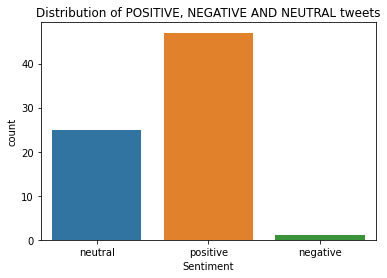

In [11]:
sns.countplot( x = "Sentiment", data = df)
plt.title("Distribution of POSITIVE, NEGATIVE AND NEUTRAL tweets")
plt.show()

### 5. From the collected tweets, create a data frame with the following features –Tweetid, text, favorite count, retweet count

In [12]:
del df['created_at']
del df['source']
del df['name']
del df['username']
del df['location']
del df['verified']
del df['description']

In [13]:
df

,text,Sentiment,neg,neu,pos,compound
0,As far as one can see nature view tree...,neutral,0.0,1.000,0.000,0.0000
1,I Loves it Happy Happiness Nature Smile...,positive,0.0,0.241,0.759,0.9578
2,Each Snowflake is Unique and Takes at leas...,positive,0.0,0.655,0.345,0.8360
3,Isle of Skye Escocia amazing na...,positive,0.0,0.612,0.388,0.5859
4,I Loves it Happy Happiness Nature Smile...,positive,0.0,0.241,0.759,0.9578
...,...,...,...,...,...,...
68,palmtrees nature bnw NaturePhotography ...,neutral,0.0,1.000,0.000,0.0000
69,Flower photography nature NaturePhotog...,neutral,0.0,1.000,0.000,0.0000
70,Good morning dear friends nature pho...,positive,0.0,0.259,0.741,0.8225
71,Sunset photography nature NaturePhot...,neutral,0.0,1.000,0.000,0.0000


### 6. For the text feature apply pre-processing techniques and create a corpus of words

In [14]:
def clean_text(text):
    punctuation = '''0123456789!()-[]:;"\,<>./?@#$%^_~*&{}'''
    nopunc = [char for char in text if char not in punctuation]
    nopunc = ''.join(nopunc)
    result = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    result = ' '.join(result)
    return result

In [15]:
df['text'] = df['text'].apply(lambda x:clean_text(x))

In [16]:
df.head()

,text,Sentiment,neg,neu,pos,compound
0,far one see nature view tree mountains blueskies,neutral,0.0,1.000,0.000,0.0000
1,Loves Happy Happiness Nature Smile Beautiful F...,positive,0.0,0.241,0.759,0.9578
2,Snowflake Unique Takes least hour fall Earth A...,positive,0.0,0.655,0.345,0.8360
3,Isle Skye Escocia amazing nature mountains,positive,0.0,0.612,0.388,0.5859
4,Loves Happy Happiness Nature Smile Beautiful F...,positive,0.0,0.241,0.759,0.9578


### 7. Apply vectorization to find the most frequent words in the corpus

In [17]:
vectorizer = TfidfVectorizer(use_idf=True, analyzer=clean_text, ngram_range=(1,3), min_df=1, stop_words='english')

vec_features = vectorizer.fit_transform(df['text'])

In [18]:
print(vec_features.toarray())

[[0.45143897 0.         0.         ... 0.         0.         0.        ]
 [0.35356278 0.         0.07100347 ... 0.         0.13563164 0.        ]
 [0.44250721 0.31709315 0.         ... 0.         0.         0.15854657]
 ...
 [0.38123155 0.         0.         ... 0.         0.09749718 0.        ]
 [0.23792134 0.         0.         ... 0.         0.20282214 0.        ]
 [0.34737753 0.         0.13952267 ... 0.         0.08883926 0.        ]]
